# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [226]:
import tensorflow as tf 

## Get the dataset

In [227]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [228]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [229]:
# Pre processing  
X_train.shape 

(8000, 28, 28)

In [230]:
Y_train.shape 

(8000,)

In [231]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [232]:
Y_train

array([7, 7, 1, ..., 1, 8, 2], dtype=uint8)

## Visualize the dataset
Print some images with labels.

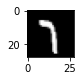

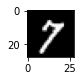

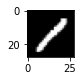

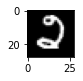

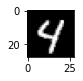

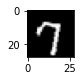

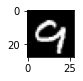

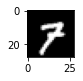

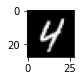

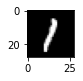

In [233]:
import matplotlib.pyplot as plt

# Your code 

for i in range(10):  
 plt.figure(figsize=(5,5))  
 plt.subplot(5,5,i+1)
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
 plt.show() 

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

In [234]:
import numpy as np  

# Your code 
import matplotlib.pyplot as plt  



## Model

In [235]:
# model building
import keras
# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation  
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout  

model= Sequential() 

model.add(Conv2D(32, (3,3), activation='relu', input_shape = (28,28,1) )) 
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu' )) 
model.add(MaxPool2D((2,2)))  


model.add(Flatten())  
model.add(Dropout(0.25))


model.add(Dense(10, activation='softmax')) 


In [236]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_35 (Flatten)        (None, 1600)              0         
                                                                 
 dropout_46 (Dropout)        (None, 1600)            

In [237]:

# Compile the model (add optimizers and metrics) 
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), metrics=['accuracy'])


# Fit the model on the training data (specify validation_split, read about validation if new to you) 



In [238]:
Model_train= model.fit(X_train, Y_train, epochs=10, validation_split= 0.2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


200/200 [==============================] - 1s 5ms/step - loss: 3.2156 - accuracy: 0.7669 - val_loss: 0.2537 - val_accuracy: 0.9225
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3018 - accuracy: 0.9137 - val_loss: 0.1819 - val_accuracy: 0.9481
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.1912 - accuracy: 0.9433 - val_loss: 0.1620 - val_accuracy: 0.9550
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.1421 - accuracy: 0.9573 - val_loss: 0.1311 - val_accuracy: 0.9594
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0915 - accuracy: 0.9706 - val_loss: 0.1318 - val_accuracy: 0.9619
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0858 - accuracy: 0.9716 - val_loss: 0.1109 - val_accuracy: 0.9700
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9770 - val_loss: 0.1037 - val_accuracy: 0.9737
Epoch 8/10
200/20

Text(0, 0.5, 'Accuracy')

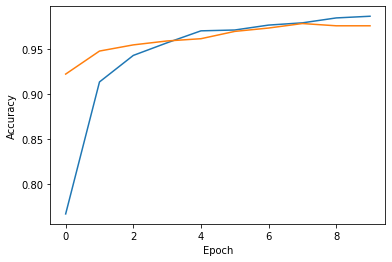

In [239]:
 plt.plot(Model_train.history['accuracy'] )  
 plt.plot(Model_train.history['val_accuracy'])  
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')

## Predict some images
Print the image along with its label (true value) and predicted value.

In [275]:
# Your code 
Model_pred = model.predict(X_test[:10]) 
arr=[]
for i in range(10):
 values=np.where(Model_pred[i]==max(Model_pred[i]))
 arr.append(values)
 

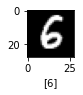

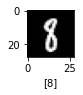

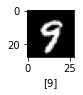

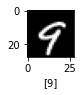

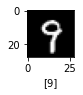

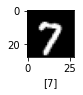

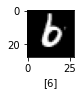

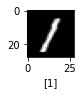

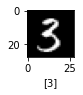

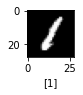

In [276]:



for i in range(10): 
 plt.figure(figsize=(5,5))
 plt.subplot(5,5,i+1) 
 plt.imshow(X_test[i],cmap=plt.get_cmap('gray'))
 plt.xlabel(f"{arr[i][0]}")